In [ ]:
# 질문 : theeshold를 어떤 값으로 해야할까
# 전처리 할때 값들이 이상하게 나오는데, 이거를 IQR로 1,3사분면안에 있는 것하고 이상치 있는거는 거기 끝까지 있는거. 
# 신용 등급은 차이안날거 같아서 -> DTT너무 임의로 해야한다. and 그 다음년도 예측
# 가격 데이터 재무데이터 차이가 있다. 

In [1]:
import pandas as pd


data = pd.read_csv('Data_AfterProcessing.csv')

In [2]:
data

,y,quick_ratio,current_ratio,art,ebitda,inventory_turnover,roe,roa,gross_margin,cost_of_sales_ratio,net_profit_growth,revenue_growth,debt_to_asset
0,1.0,1.417017,3.387721,5.113461,41.957,2.344411,0.050257,0.038954,0.215419,0.784581,-0.423075,0.048704,0.224901
1,0.0,1.258606,3.137218,4.707644,34.691,1.909435,0.033067,0.025345,0.216727,0.783273,-0.323019,-0.094064,0.233534
2,0.0,1.291232,3.699708,5.559703,23.251,1.781866,0.001033,0.000775,0.196834,0.803166,-0.971756,-0.094348,0.250097
3,0.0,1.961234,4.544452,4.744249,29.106,1.878356,0.031507,0.022733,0.194215,0.805785,32.547703,0.065244,0.278472
4,0.0,2.068690,4.397484,4.087982,34.766,2.132333,0.034371,0.024572,0.195392,0.804608,0.102064,0.107028,0.285096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75717,1.0,4.502787,4.732289,0.772669,-47.847,0.499454,-0.387714,-0.348043,0.619226,0.380774,0.431303,0.458131,0.102320
75718,1.0,1.046749,3.724264,19.997736,-31.296,2.660003,-0.736576,-0.497621,0.139860,0.860140,-22.274225,-0.281421,0.324413
75719,1.0,1.399979,3.401307,13.415098,-4.848,2.276800,-0.200218,-0.127674,0.242805,0.757195,-0.772917,-0.342292,0.362324
75720,1.0,0.276358,0.280671,0.126984,-331.357,153.517130,1.147647,-1.149607,-1380.654167,1381.654167,0.201208,-0.743041,2.001708


### Financial Ratios

- **quick_ratio**:  유동 자산에서 재고를 제외한 후 유동 부채와의 비율, 즉 기업이 즉시 상환할 수 있는 유동성 자산의 비율.
- **current_ratio**: 유동 자산을 유동 부채로 나눈 값, 즉 기업의 단기 채무에 대한 상환 능력.
- **art (Accounts Receivable Turnover)**: 매출액을 매출채권으로 나눈 값으로, 기업의 매출채권 회전율을 나타냅니다.
- **ebitda**: 영업이익(EBIT)에서 감가상각비(Depreciation)와 상각비(Amortization)를 더한 값으로, 기업의 현금 창출 능력을 보여줍니다.
- **inventory_turnover**: 매출 원가(COGS)를 재고로 나눈 값으로, 재고의 회전율을 나타냅니다.
- **roe (Return on Equity)**: 순이익을 자기 자본으로 나눈 값으로, 기업의 자기 자본에 대한 수익률을 나타냅니다.
- **roa (Return on Assets)**: 순이익을 총 자산으로 나눈 값으로, 기업의 자산에 대한 수익률을 나타냅니다.
- **gross_margin**: 매출에서 매출원가를 뺀 금액을 매출로 나눈 값으로, 기업의 매출 총이익률을 나타냅니다.
- **cost_of_sales_ratio**: 매출 원가를 매출로 나눈 값으로, 매출 대비 원가의 비율을 나타냅니다.
- **net_profit_growth**: 전년 대비 순이익의 성장률을 나타냅니다.
- **revenue_growth**: 전년 대비 매출액 성장률을 나타냅니다.
- **debt_to_asset**: 총 부채를 총 자산으로 나눈 값으로, 기업의 자산 대비 부채 비율을 나타냅니다.
- **interest_bearing_debt_ratio**: 이자를 지급해야 하는 부채를 총 자산으로 나눈 값으로, 기업의 이자 지급 부채 비율을 나타냅니다.

In [3]:
data.describe()

,y,quick_ratio,current_ratio,art,ebitda,inventory_turnover,roe,roa,gross_margin,cost_of_sales_ratio,net_profit_growth,revenue_growth,debt_to_asset
count,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000,75722.000000
mean,0.318864,1.681815,2.323127,18.745181,829.881490,41.476161,-0.251037,-0.019499,0.005762,0.994238,0.260604,0.529878,0.279812
std,0.466039,1.952659,2.202987,212.086503,3447.249466,3172.780256,59.452746,0.308400,37.994639,37.994639,74.371720,20.670872,0.230393
min,0.000000,0.001837,0.005053,-10.296089,-21913.000000,-53.368996,-16199.300000,-25.132022,-9833.333333,-357.210526,-3414.090909,-9.494160,0.000002
25%,0.000000,0.805459,1.215471,4.929309,5.947000,3.170568,-0.026038,-0.018992,0.218815,0.521955,-0.785264,-0.026928,0.120831
50%,0.000000,1.205047,1.808753,6.683080,60.260500,5.608137,0.048421,0.033019,0.334918,0.665082,-0.039981,0.070862,0.253878
75%,1.000000,1.880525,2.734881,10.093401,361.130000,13.291410,0.096413,0.071304,0.478045,0.781185,0.403268,0.203655,0.387859
max,1.000000,100.633413,101.129076,33681.600000,128137.000000,823674.666667,925.483871,21.789094,358.210526,9834.333333,11367.000000,3701.466667,8.797941


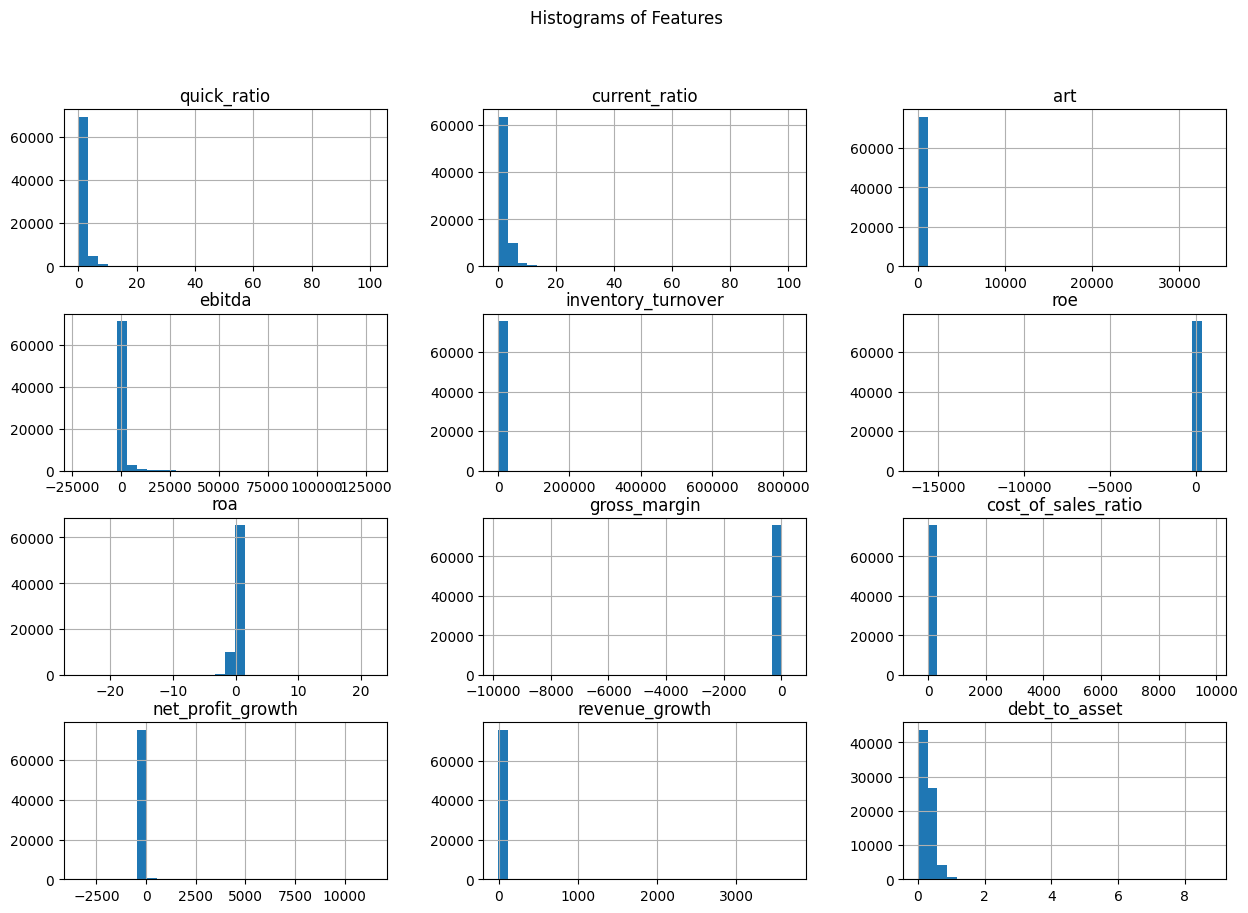

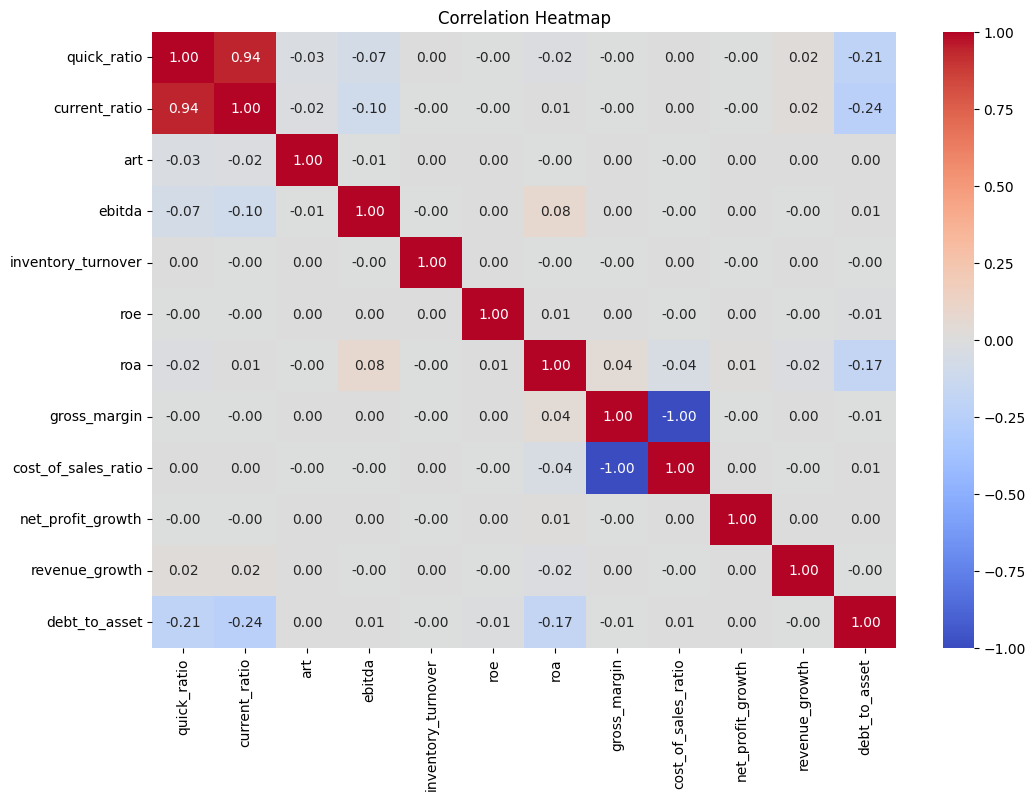

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Drop the 'y' column for EDA
data_features = data.drop(columns=['y'])


# Plot histograms for each feature
data_features.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# IQR을 사용하여 이상치를 처리하는 함수
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# 처리할 열 목록
columns_to_clip = ['quick_ratio', 'art', 'ebitda', 'inventory_turnover', 'roe', 'roa', 'gross_margin', 'net_profit_growth', 'revenue_growth', 'debt_to_asset','current_ratio','cost_of_sales_ratio']

# 각 열에 대해 IQR을 사용하여 이상치를 클리핑
for column in columns_to_clip:
    clip_outliers_iqr(data, column)

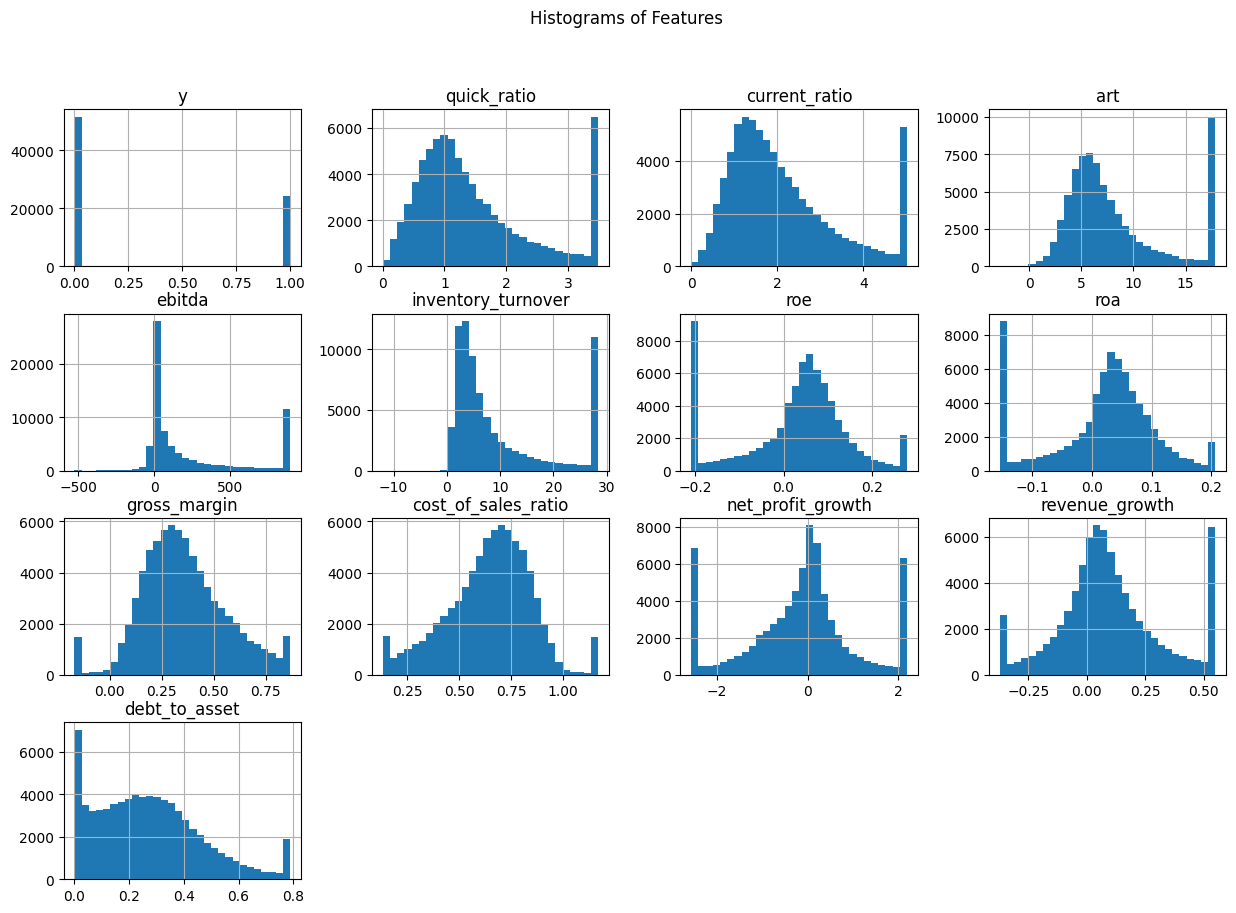

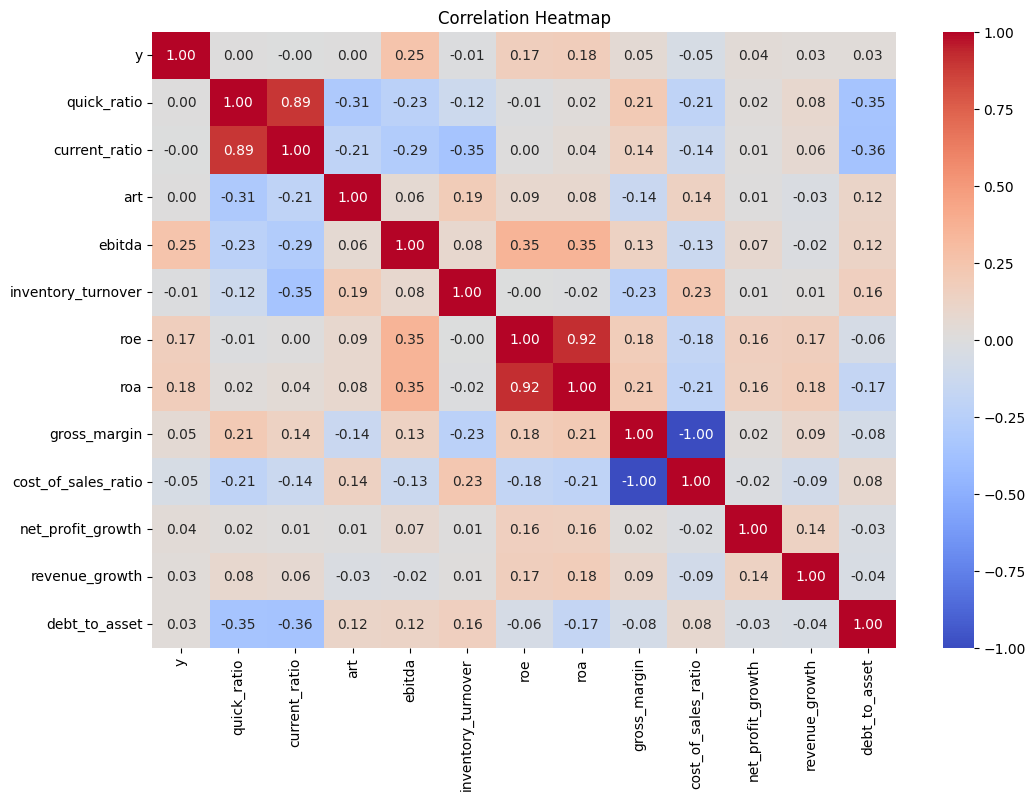

In [6]:
# Plot histograms for each feature
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
data = data.drop(columns=['current_ratio','cost_of_sales_ratio','roe'])

In [8]:
data

,y,quick_ratio,art,ebitda,inventory_turnover,roa,gross_margin,net_profit_growth,revenue_growth,debt_to_asset
0,1.0,1.417017,5.113461,41.957,2.344411,0.038954,0.215419,-0.423075,0.048704,0.224901
1,0.0,1.258606,4.707644,34.691,1.909435,0.025345,0.216727,-0.323019,-0.094064,0.233534
2,0.0,1.291232,5.559703,23.251,1.781866,0.000775,0.196834,-0.971756,-0.094348,0.250097
3,0.0,1.961234,4.744249,29.106,1.878356,0.022733,0.194215,2.186066,0.065244,0.278472
4,0.0,2.068690,4.087982,34.766,2.132333,0.024572,0.195392,0.102064,0.107028,0.285096
...,...,...,...,...,...,...,...,...,...,...
75717,1.0,3.493126,0.772669,-47.847,0.499454,-0.154435,0.619226,0.431303,0.458131,0.102320
75718,1.0,1.046749,17.839540,-31.296,2.660003,-0.154435,0.139860,-2.568063,-0.281421,0.324413
75719,1.0,1.399979,13.415098,-4.848,2.276800,-0.127674,0.242805,-0.772917,-0.342292,0.362324
75720,1.0,0.276358,0.126984,-331.357,28.472673,-0.154435,-0.170029,0.201208,-0.372803,0.788403


In [9]:
from sklearn.model_selection import train_test_split



X = data.drop('y', axis=1)
y = data.loc[:, ['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train['y']
y_test = y_test['y']


In [10]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

logit = sm.Logit(y_train, X_train)
logit_fit = logit.fit()
print(logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.599935
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                60577
Model:                          Logit   Df Residuals:                    60568
Method:                           MLE   Df Model:                            8
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.04192
Time:                        15:10:23   Log-Likelihood:                -36342.
converged:                       True   LL-Null:                       -37933.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
quick_ratio           -0.1059      0.009    -11.248      0.000      -0.124      -0.087
art  

In [11]:
pred_prob = logit_fit.predict(X_test)

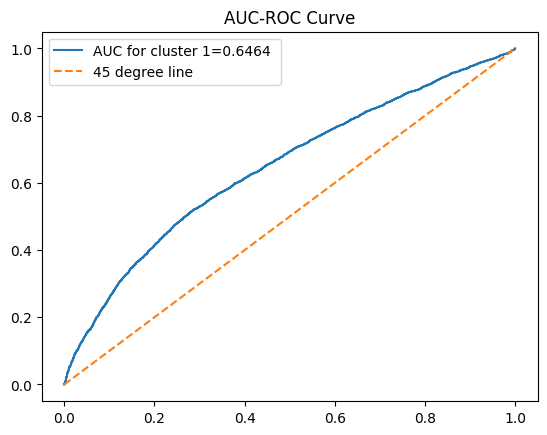

In [12]:
false_pos, true_pos, _ = roc_curve(y_test.values,  pred_prob)
auc = roc_auc_score(y_test, pred_prob)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()

In [13]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [14]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [15]:
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)


SVC(class_weight='balanced')

In [16]:
y_pred_SVC = svc.predict(X_test)

print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_SVC)))

The ROC AUC score of SVC for first cluster is 0.6350


In [17]:
# Polynomical kernel
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

poly_svm = SVC(kernel="poly", degree=3, coef0=1, C=5)


poly_svm.fit(X_train, y_train)

y_pred_svm_poly = poly_svm.predict(X_test)

print('The ROC AUC score of SVC_poly for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_svm_poly)))

The ROC AUC score of SVC_poly for first cluster is 0.5689


In [18]:
# Gaussian RBF Kernel

rbf_svm = SVC(kernel="rbf", degree=3, coef0=1, C=5)


rbf_svm.fit(X_train, y_train)

y_pred_svm_rbf = rbf_svm.predict(X_test)

print('The ROC AUC score of SVC_poly for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_svm_rbf)))

The ROC AUC score of SVC_poly for first cluster is 0.5791


## Decision Tree for PD Estimation

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [20]:
y_pred_dt = tree_clf.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_dt)))

The ROC AUC score of RF for first cluster is 0.5983


## Random Forest for PD Estimation

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [22]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train, y_train)
print('Best hyperparameters in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

/opt/miniconda3/envs/human_class/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/human_class/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/human_class/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/human_class/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs

Best hyperparameters in RF 0.6547894950911515 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}


In [23]:
y_pred_RF = halve_RF.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_RF)))

The ROC AUC score of RF for first cluster is 0.5819


### Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_rf_bagging = bag_clf.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_rf_bagging)))

The ROC AUC score of RF for first cluster is 0.5854


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf_bagging))

0.7096071310663585


### *Boosting*

- AdaBoosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [27]:
y_pred_rf_ada = ada_clf.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_rf_ada)))

The ROC AUC score of RF for first cluster is 0.5971


- Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [29]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [30]:
y_pred_rf_gbrt = gbrt.predict(X_test)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test, y_pred_rf_gbrt)))

The ROC AUC score of RF for first cluster is 0.6815


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

# Create and fit the XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='auc')
xgb_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]

# Predict classes
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate the ROC AUC score
auc_xgb = roc_auc_score(y_test, y_pred_xgb_prob)
print('The ROC AUC score of XGBoost is {:.4f}'.format(auc_xgb))

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('The accuracy of XGBoost is {:.4f}'.format(accuracy_xgb))

# Calculate F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print('The F1 score of XGBoost is {:.4f}'.format(f1_xgb))

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print('The recall of XGBoost is {:.4f}'.format(recall_xgb))

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print('The precision of XGBoost is {:.4f}'.format(precision_xgb))

The ROC AUC score of XGBoost is 0.7134
The accuracy of XGBoost is 0.7135
The F1 score of XGBoost is 0.4361
The recall of XGBoost is 0.3485
The precision of XGBoost is 0.5826


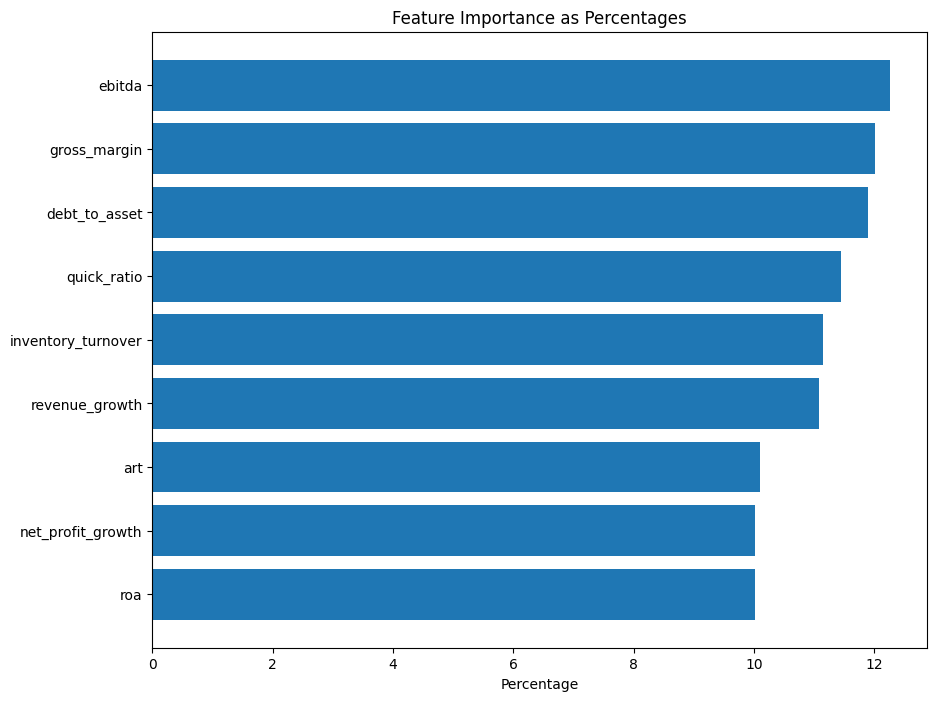

In [34]:
from xgboost import plot_importance


# Get the feature importances and convert to percentages
importance = xgb_clf.get_booster().get_score(importance_type='weight')
importance = {k: v / sum(importance.values()) * 100 for k, v in sorted(importance.items(), key=lambda item: item[1], reverse=False)}

# Plot the percentages
plt.figure(figsize=(10, 8))
plt.barh(list(importance.keys()), list(importance.values()))
plt.xlabel('Percentage')
plt.title('Feature Importance as Percentages')
plt.show()